# Job Recommendation System

#### A job recommendation system is an application that recommends jobs to a user according to the skills and the user’s desired job role. LinkedIn is one of the most popular applications using a job recommendation system to help its users find the best jobs according to their skills and desired positions.

## Libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [5]:
data = pd.read_csv("jobs.csv")

## EDA

In [7]:
data.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [8]:
data = data.drop("Unnamed: 0",axis=1)

In [9]:
data.isnull().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

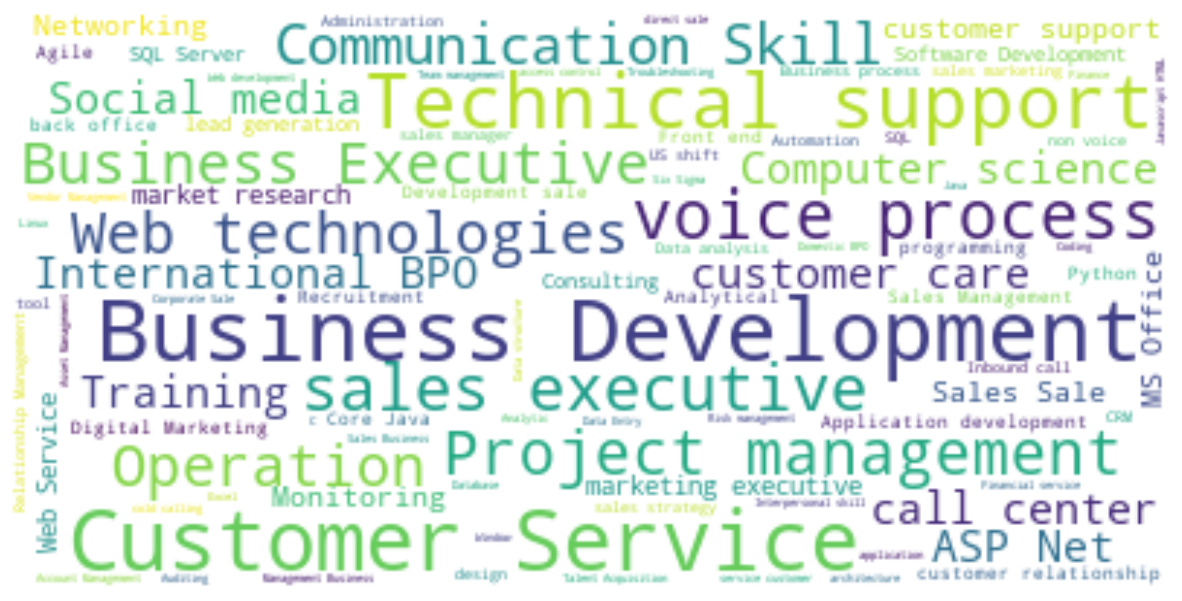

In [10]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

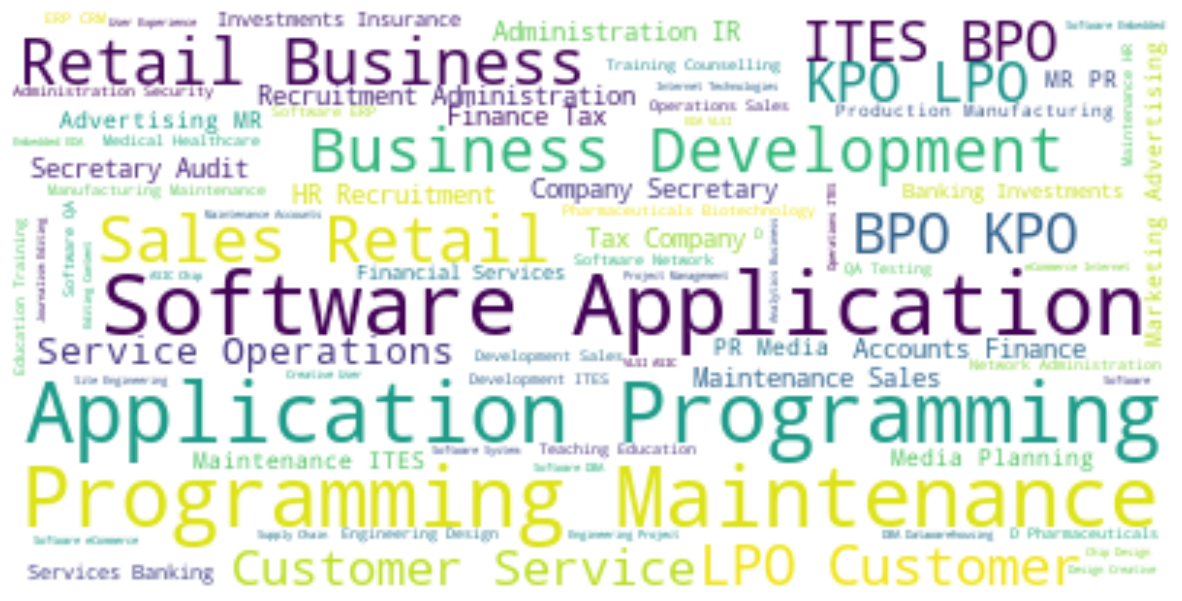

In [11]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

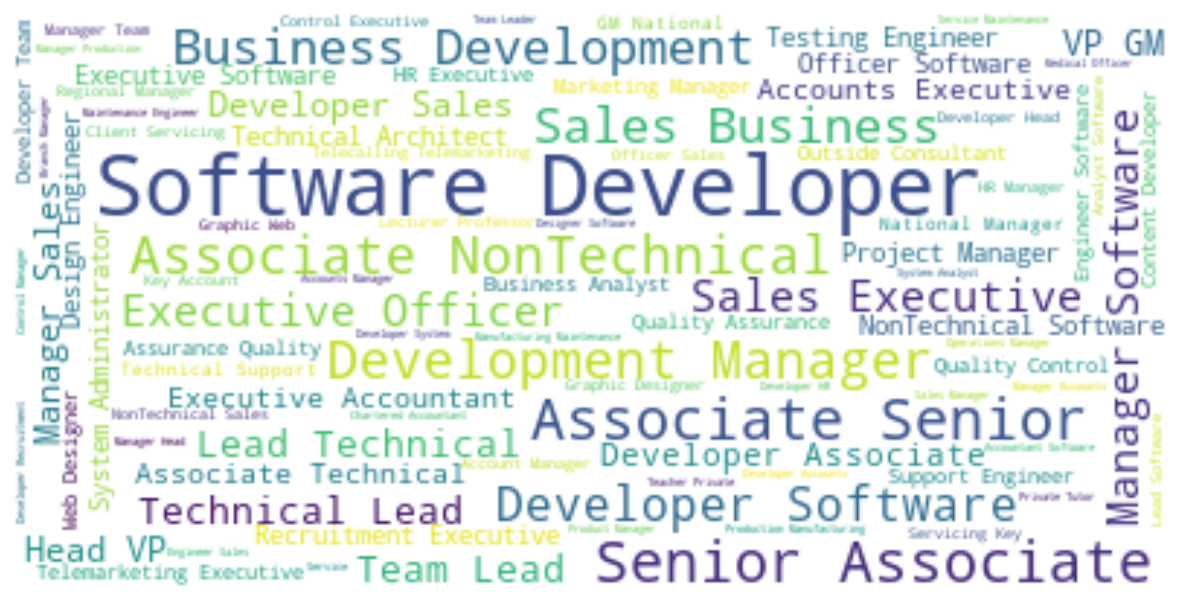

In [12]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
word_freq = wordcloud.words_  # This gives a dictionary of words and their frequencies

# Check if each item is a string
string_check = [isinstance(item, str) for item in word_freq.keys()]

# Print results
for item, is_str in zip(word_freq.keys(), string_check):
    print(f"{item}: {'is a string' if is_str else 'is not a string'}")

Software Developer: is a string
Associate Senior: is a string
Senior Associate: is a string
Development Manager: is a string
Associate NonTechnical: is a string
Business Development: is a string
Sales Business: is a string
Developer Software: is a string
Executive Officer: is a string
Sales Executive: is a string
Manager Software: is a string
Technical Lead: is a string
Lead Technical: is a string
Team Lead: is a string
Manager Sales: is a string
Developer Sales: is a string
Head VP: is a string
VP GM: is a string
Developer Associate: is a string
Associate Technical: is a string
Accounts Executive: is a string
Executive Accountant: is a string
Recruitment Executive: is a string
NonTechnical Software: is a string
Testing Engineer: is a string
Executive Software: is a string
Officer Software: is a string
Technical Architect: is a string
Design Engineer: is a string
Project Manager: is a string
System Administrator: is a string
Telemarketing Executive: is a string
HR Executive: is a strin

In [24]:
from sklearn.feature_extraction import text

#unique_words = set()

#for item in data["Key Skills"]:
#    words = item.split('| ')
#    unique_words.update(words)

# Convert to list (if needed)
#feature = list(unique_words)

feature = data["Key Skills"].tolist()
tfidf = text.TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [36]:
# Setting job title as index
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [38]:
print(data['Job Title'].unique())
print('----------------------------------------------------')
print(indices.index.unique())
print('----------------------------------------------------')
print(tfidf_matrix.shape)

['Media Planning Executive/Manager' 'Sales Executive/Officer'
 'R&D Executive' 'Technical Support Engineer' 'Testing Engineer'
 'System Analyst' 'Technical Architect'
 'Associate/Senior Associate -(Technical)'
 'Corporate Planning/Strategy Manager' 'Webmaster' 'Process Flow Analyst'
 'Software Developer' 'Social Media Marketing Manager'
 'Senior Design Engineer' 'Accounts Manager' 'Sales Officer'
 'Sales/Business Development Manager'
 'Quality Assurance/Quality Control Executive' 'Graphic/Web Designer'
 'Area Sales Manager' 'System Administrator' 'Project Manager-IT/Software'
 'Project Lead' 'Logistics Executive' 'Accounts Executive/Accountant'
 'Associate/Senior Associate -(NonTechnical)' 'Technical Support Manager'
 'Regional Manager' 'Head / VP/ GM/ National Manager After Sales'
 'Team Leader -(NonTechnical)' 'Content Developer' 'DBA' 'HR Executive'
 'Head/VP/GM/National Manager -Sales'
 'Centre Head / Branch Head / Club Manager' 'Project Architect'
 'Front Office/Guest Relations Ex

In [42]:
def __jobs_recommendation(Title, similarity=similarity):
    
    if Title not in indices.index:
        return f"Job title '{Title}' not found in the dataset."

    index = indices[Title]  # This should give a single index value
    similarity_scores = list(enumerate(similarity[index]))  # Use the index directly
    print(f"'{Title}' için indeks: {index}")
    print(similarity.shape)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 'Key Skills']].iloc[newsindices]

In [48]:
indices

Job Title
Media Planning Executive/Manager                  0
Sales Executive/Officer                           1
R&D Executive                                     2
Technical Support Engineer                        3
Testing Engineer                                  4
                                              ...  
Software Developer                            27005
Operations Manager                            27006
Lecturer/Professor                            27007
Software Developer                            27008
Search Engine Optimisation /SEO Specialist    27009
Length: 27010, dtype: int64

In [54]:
similarity.shape


(200, 200)

In [46]:
jobs_recommendation("Software Developer")

'Software Developer' için indeks: Job Title
Software Developer       13
Software Developer       17
Software Developer       18
Software Developer       23
Software Developer       24
                      ...  
Software Developer    26990
Software Developer    26996
Software Developer    27001
Software Developer    27005
Software Developer    27008
Length: 6250, dtype: int64


'Error retrieving similarity scores: index 201 is out of bounds for axis 0 with size 200'